# Extração de Informações dos Histogramas de Projeção
***

### Importação dos pacotes
***

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Explorando o funcionamento do gradiente
***

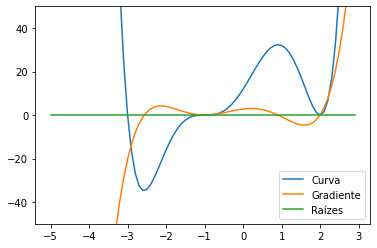

In [2]:
x = np.arange(-5,3, 0.1)
y = (x+3)*((x-2)**2)*((x+1)**3)
plt.plot(x,y, label = 'Curva')
plt.plot(x, np.gradient(y), label="Gradiente")
plt.plot(x, np.zeros(x.shape), label='Raízes')
plt.ylim([-50,50])
plt.legend()

### Funções Úteis
***

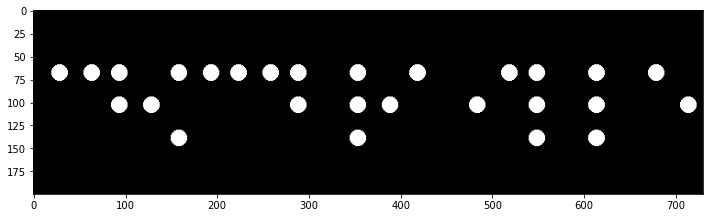

In [36]:
img = cv2.imread("imagens/CHMC-Braille.png", 0)
_ , img_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
img_bin = (~img_bin)/255.
plt.figure(figsize=(12,12))
plt.imshow(img_bin, cmap='gray')

In [29]:
def make_histogram_x(img):
    '''
    Organiza os dados da projeção vertical na imagem
    
    Entrada:
    img -> Array da imagem
    
    Saída:
    hist -> Array com os valores do histograma de projeção vertical
    '''

    height, width = img.shape

    hist = np.zeros(width)
    for x in range(height):
        for y in range(width):
            if (img_bin[x][y] == 1):
                hist[y] += 1
    
    return np.array(hist)

In [39]:
def make_histogram_y(img):
    '''
    Organiza os dados da projeção horizontal na imagem
    
    Entrada:
    img -> Array da imagem
    
    Saída:
    hist -> Array com os valores do histograma de projeção horizontal
    '''

    height, width = img.shape

    hist = np.zeros(height)
    for x in range(height):
        for y in range(width):
            if (img_bin[x][y] == 1):
                hist[x] += 1
    
    return np.array(hist)  

(0.0, 730.0)

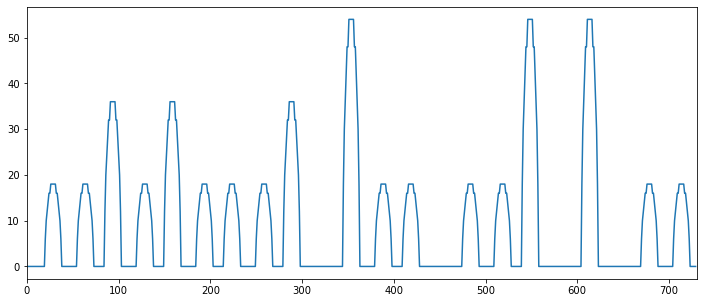

In [51]:
hist_x = make_histogram_x(img_bin)
x = np.arange(len(hist_x))
plt.figure(figsize=(12,5))
plt.plot(x, hist_x)
plt.xlim(0,730)

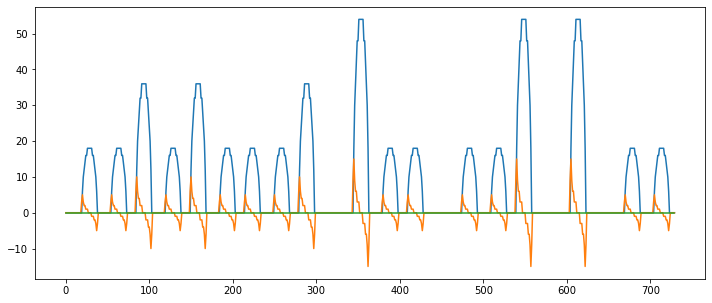

In [92]:
plt.figure(figsize=(12,5))
plt.plot(x, hist_x)
plt.plot(x, np.gradient(hist_x))
plt.plot(x, np.zeros(x.shape))

(0.0, 200.0)

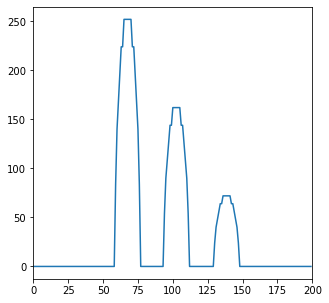

In [53]:
hist_y = make_histogram_y(img_bin)
x = np.arange(len(hist_y))
plt.figure(figsize=(5,5))
plt.plot(x, hist_y)
plt.xlim(0,200)

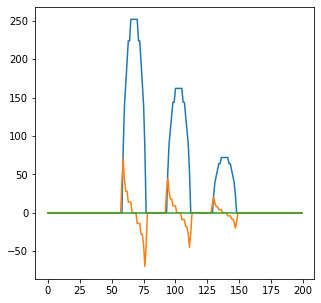

In [95]:
plt.figure(figsize=(5,5))
x = np.arange(len(hist_y))
plt.plot(x, hist_y)
plt.plot(x, np.gradient(hist_y))
plt.plot(x, np.zeros(x.shape))

In [62]:
def stroke(gradient_array):
    '''
    Identifica os pontos que estão no pico de um histograma vertical e os normaliza
    
    Entrada:
    gradient_array -> Gradiente do array com os pontos da curva no histograma vertical
    
    Saída:
    maximum_points -> Array dos pontos máximos normalizados 
    '''
    
    maximum_points = np.zeros(gradient_array.shape)
    for i in range(0, len(gradient_array)):
        ref_in = gradient_array[i]
        sum_points = np.zeros(len(gradient_array))
        for j in range(1, len(gradient_array)):
            if j <= (len(gradient_array)-1):
                try:
                    if (ref_in != 0) and (gradient_array[i+j] == 0):
                        sum_points[i+j] = 1
                        try:
                            if (gradient_array[i+j+1] < ref_in) and (gradient_array[i+j+1] != 0):
                                maximum_points = np.sum((maximum_points, sum_points), axis=0)
                        except: 
                            pass
                    else:
                        break
                except:
                    pass
            else:
                break
    
    return maximum_points

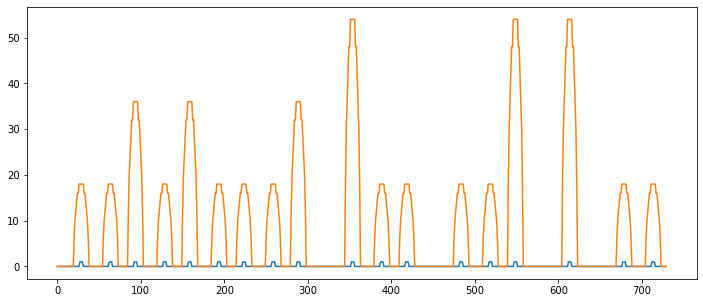

In [96]:
plt.figure(figsize=(12,5))
x = np.arange(0,len(hist_x))
plt.plot(x, stroke(np.gradient(hist_x)))
plt.plot(x, hist_x) 

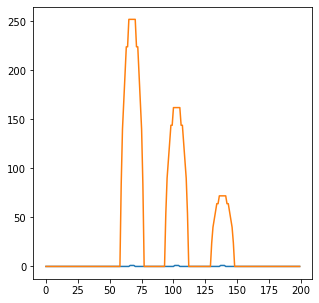

In [97]:
plt.figure(figsize=(5,5))
x = np.arange(0,len(hist_y))
plt.plot(x, stroke(np.gradient(hist_y)))
plt.plot(x, hist_y) 

In [80]:
def delimiter(gradient_array):
    
    #delimiter_points = np.zeros(gradient_array.shape)
    sum_points = np.zeros((gradient_array.shape))
    for i in range(0, len(gradient_array)):
        ref_in = gradient_array[i]
        if (ref_in > 0) and (gradient_array[i+1] > 0) and (gradient_array[i-1] == 0):
            sum_points[i-1] = 1
        elif (ref_in < 0) and (gradient_array[i+1] == 0) and (gradient_array[i-1] < 0):
            sum_points[i+1] = -1
    
    return sum_points

In [71]:
def delimiter(gradient_array):
    
    delimiter_points = np.zeros(gradient_array.shape)
    for i in range(0, len(gradient_array)):
        ref_in = gradient_array[i]
        sum_points = np.zeros(gradient_array.shape)
        for j in range(1, len(gradient_array)):
            if j <= (len(gradient_array)-1): 
                try:
                    if (ref_in > 0) and (gradient_array[i+j] > 0) and (gradient_array[i-1] == 0):
                        sum_points[i+j-1] = 1
                        delimiter_points = np.sum((delimiter_points, sum_points), axis=0)
                    elif (ref_in < 0) and (gradient_array[i+j] == 0) and (gradient_array[i-1] < 0):
                        sum_points[i+j+1] = -1
                        delimiter_points = np.sum((delimiter_points, sum_points), axis=0)
                    else:
                        break
                except:
                    pass
            else:
                break
    
    return delimiter_points

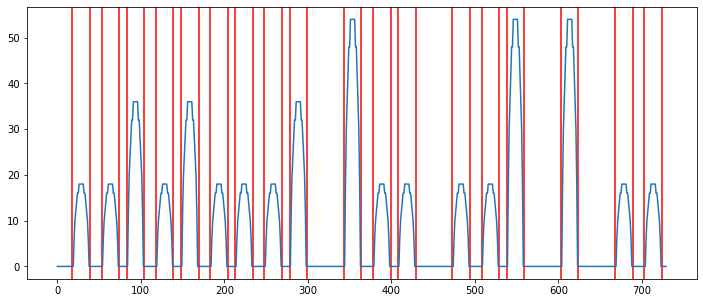

In [109]:
plt.figure(figsize=(12,5))

count = -1 
xcords = list()
for i in range(0, len(hist_x)):
    count += 1
    if (np.abs(delimiter(np.gradient(hist_x)))[i] == 1):
        xcords.append(count) 
        
x = np.arange(0,len(hist_x))
for xc in xcords:
    plt.axvline(xc, color='red')
plt.plot(x, hist_x) 

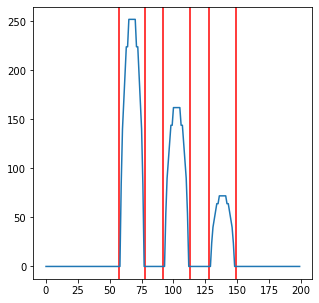

In [119]:
plt.figure(figsize=(5,5))

count = -1 
ycords = list()
for i in range(0, len(hist_y)):
    count += 1
    if (np.abs(delimiter(np.gradient(hist_y)))[i] == 1):
        ycords.append(count) 
        
x = np.arange(0,len(hist_y))
for yc in ycords:
    plt.axvline(yc, color='red')
plt.plot(x, hist_y) 

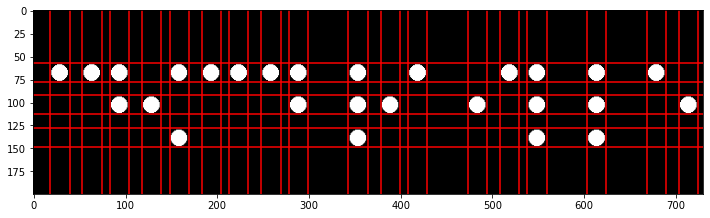

In [118]:
plt.figure(figsize=(12,5))
plt.imshow(img_bin, cmap = 'gray')

count = -1 
xcords = list()
for i in range(0, len(hist_x)):
    count += 1
    if (np.abs(delimiter(np.gradient(hist_x)))[i] == 1):
        xcords.append(count) 
        
x = np.arange(0,len(hist_x))
for xc in xcords:
    plt.axvline(xc, color='red')
    
count = -1 
ycords = list()
for i in range(0, len(hist_y)):
    count += 1
    if (np.abs(delimiter(np.gradient(hist_y)))[i] == 1):
        ycords.append(count) 
        
x = np.arange(0,len(hist_y))
for yc in ycords:
    plt.axhline(yc, color='red')